In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
)

In [2]:
df=pd.read_csv('/content/emotions.csv')
df = df.drop_duplicates()
df = df.dropna()
print(df)

                                                 text emotions 
0   im feeling rather rotten so im not very ambiti...       sad
1           im updating my blog because i feel shitty       sad
2   i never make her separate from me because i do...       sad
3   i left with my bouquet of red and yellow tulip...       joy
4     i was feeling a little vain when i did this one       sad
5   i cant walk into a shop anywhere where i do no...      fear
6    i felt anger when at the end of a telephone call     anger
7   i explain why i clung to a relationship with a...       joy
8   i like to have the same breathless feeling as ...       joy
9   i jest i feel grumpy tired and pre menstrual w...     anger
10                 i don t feel particularly agitated      fear
11  i feel beautifully emotional knowing that thes...       sad
12  i pay attention it deepens into a feeling of b...      fear
13  i just feel extremely comfortable with the gro...       joy
14  i find myself in the odd position of

In [3]:
print(df.head())

                                                text emotions 
0  im feeling rather rotten so im not very ambiti...       sad
1          im updating my blog because i feel shitty       sad
2  i never make her separate from me because i do...       sad
3  i left with my bouquet of red and yellow tulip...       joy
4    i was feeling a little vain when i did this one       sad


In [4]:
def clean_text(text):
  text=re.sub(r"http\s+","",text)
  text=text.translate(str.maketrans('','',string.punctuation))
  return text
  df['clean_text']=df['text'].apply(clean_text)
  print (df['clean_text'])
print (df.head())

                                                text emotions 
0  im feeling rather rotten so im not very ambiti...       sad
1          im updating my blog because i feel shitty       sad
2  i never make her separate from me because i do...       sad
3  i left with my bouquet of red and yellow tulip...       joy
4    i was feeling a little vain when i did this one       sad


<ipython-input-7-c2b910e4ac23>:4: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


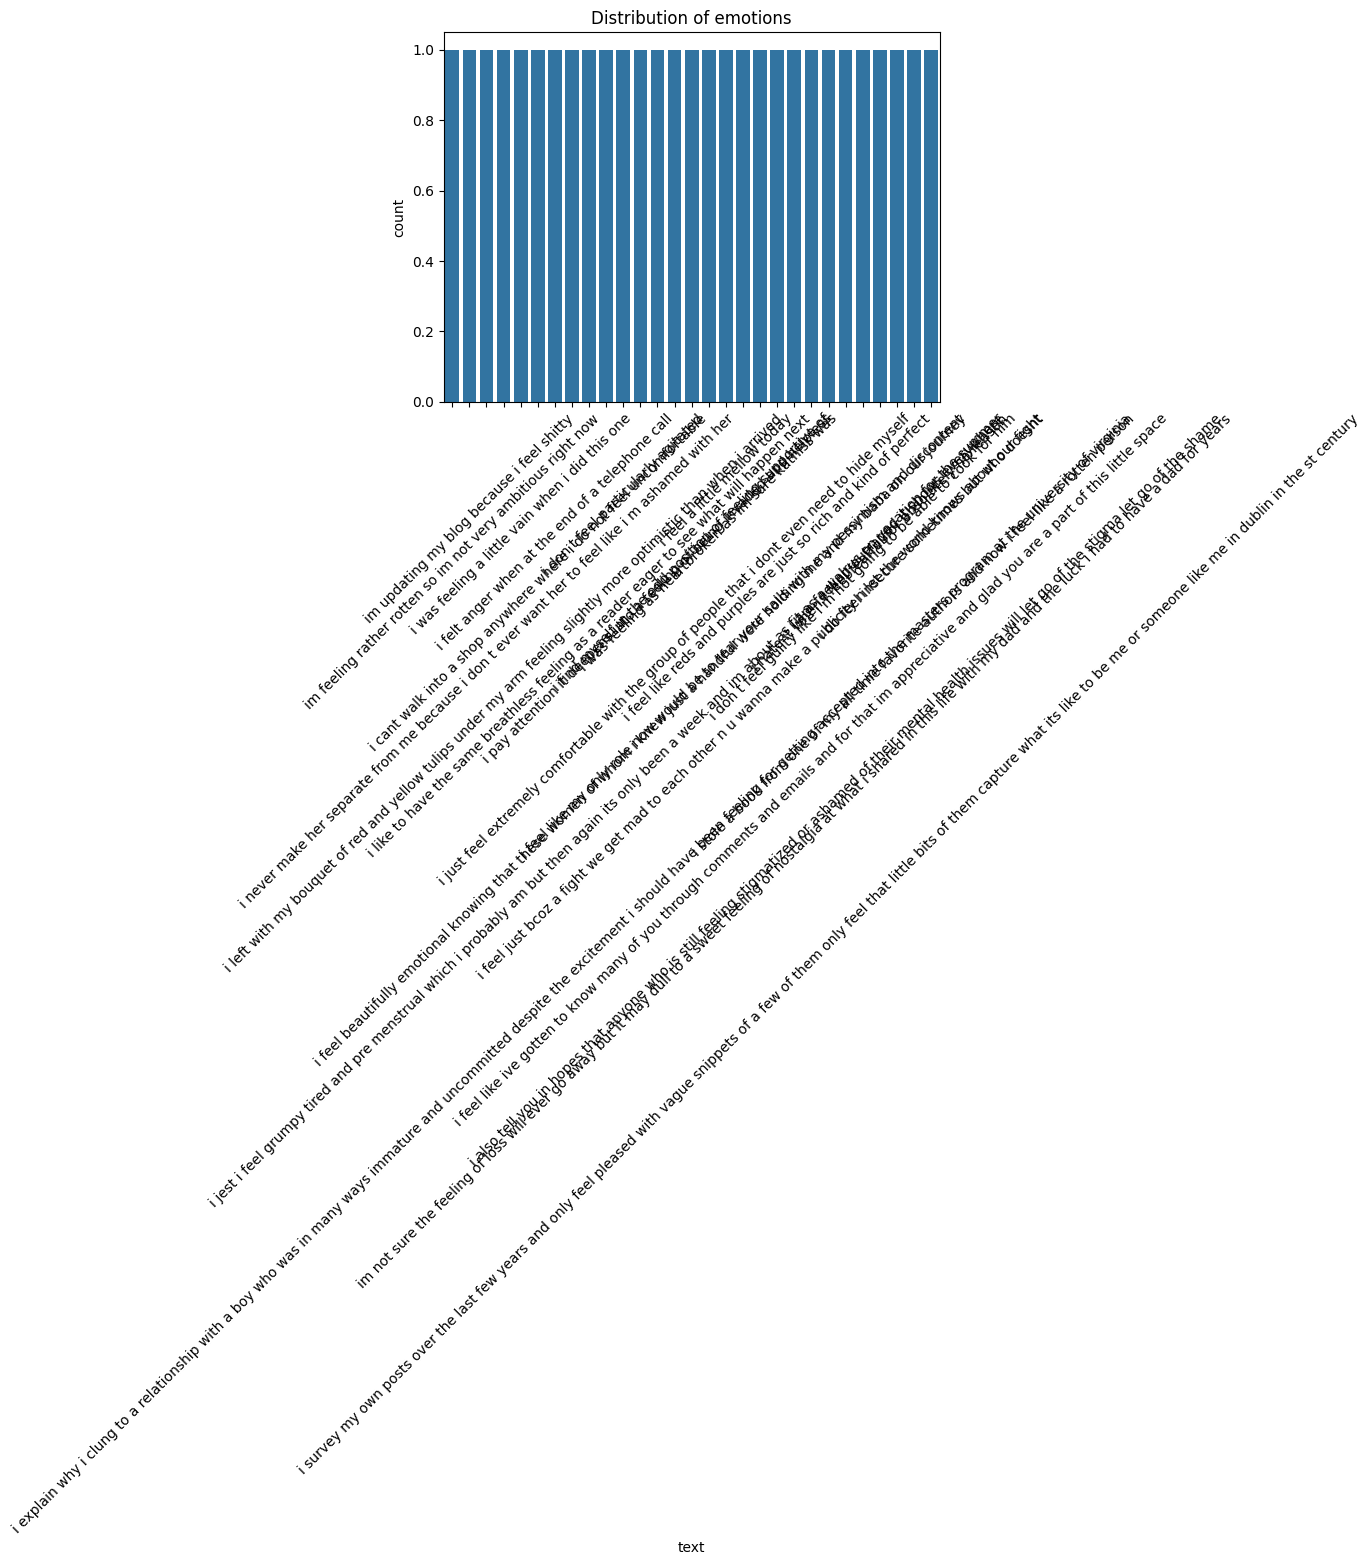

In [7]:
sns.countplot(x='text',data=df)
plt.title('Distribution of emotions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
sns.countplot(x='label',data=df)
plt.title('Distribution of emotions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
def clean_text(text):
  text=re.sub(r"http\s+","",text)
  text=text.translate(str.maketrans('','',string.punctuation))
  return text
df['clean_text']=df['text'].apply(clean_text) # Moved this line outside the function
emotion_types=df['emotion'].unique()
for emotion in emotion_types:
  text=' '.join(df[df['emotion']==emotion]['clean_text'])
  wordcloud=WordCloud(width=800,height=400,background_color='white').generate(text)
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud,interpolation='bilinear')
  plt.title(f'WordCloud for {emotion}')
  plt.axis('off')
  plt.show()

In [ ]:
X=df['clean_text']
y=df['emotion']
vectorizer=TfidfVectorizer(max_features=5000)
X_vec=vectorizer.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_vec,y,test_size=0.2,random_state=42)
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

In [ ]:
def predict_emotion(text):
  cleaned=clean_text(text)
  vec=vectorizer.transform([cleaned])
  return model.predict(vec)[0]
print(predict_emotion("This is the Best day ever."))